In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import json
import requests

# Load the datasets
There are 20 features inside movies csv file:
- budget
- genres
- homepage
- id
- keywords
- original_language
- original_title
- overview
- popularity
- production_companies
- production_countries
- release_date
- revenue
- runtime
- spoken_languages
- status
- tagline
- title
- vote_average
- vote_count


In [3]:
df_movies = pd.read_csv("datasets/analytic_report/tmdb_5000_movies.csv")

In [4]:
df_movies.describe(include="all")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,NaN,[],en,Batman,From Spike Lee comes this vibrant semi-autobio...,NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Out of the Blue,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


In [5]:
df_movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
# Get the region for each country
# !curl -O https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.json
# !mv all.json countries.json

In [7]:
df_movies["country"] = df_movies["production_countries"].apply(lambda x: [country["iso_3166_1"] for country in json.loads(x)])
df_movies["company"] = df_movies["production_companies"].apply(lambda x: [company["name"] for company in json.loads(x)])

In [8]:
total_countries = []

for countries in df_movies["country"]:
    for country in countries:
        if country not in total_countries:
            total_countries.append(country)
    
print(f"Total countries in this dataset: {len(total_countries)}")

companies_data = json.loads(open("companies.json", "r").read())

# for companies in df_movies["company"]:
#     for company in companies:
#         if company not in companies_data:
#             companies_data[company] = {
#                 "origin_country": None
#             }

total_companies = list(companies_data.keys())
print(f"Total companies in this dataset: {len(total_companies)}")

Total countries in this dataset: 88
Total companies in this dataset: 5017


In [9]:
df_movies = df_movies[df_movies["country"].str.len() > 0]

By using TheMovieDB data (code below), I gather all the countries of the production companies to ensure which country gain the most profit

Currently, I choose the the country of the first company to hold the profit.

We can also distribute the revenue to each company with a predefined ratio.


In [10]:
# get the country information for the companies
# for company in total_companies:
#     print(company)
#     response = requests.get(f"https://api.themoviedb.org/3/search/company?api_key=3218acc56fdfdf9465300c9c2f8e4415&query={company}&page=1")
#     result = response.json()
    
#     if len(result["results"]) > 0 and result["results"][0]["origin_country"]:
#         companies_data[company]["origin_country"] = result["results"][0]["origin_country"]

# f = open("companies.json", "w+")
# f.write(json.dumps(companies_data))
# f.close()

In [11]:
index = 0

for company_name in companies_data:
    company = companies_data[company_name]
    
    if not company["origin_country"]:
        index += 1

print("Total companies having no country data:", index)

Total companies having no country data: 3428


In [12]:
# organize data by coninents
global_countries_1 = json.loads(open("countries.json", "r").read())
global_countries = {}

for country in global_countries_1:
    global_countries[country["alpha-2"]] = {
        "region": country["region"],
        "name": country["name"],
        "code": country["alpha-2"]
    }

In [13]:
# movies having no company or when company misses data,
# I use the first production country as the default one
df_movies["original_country"] = ""

for index, row in df_movies.iterrows():
    original_country = None
    
    if len(row["company"]) > 0:
        original_country = companies_data[row["company"][0]]["origin_country"]
        
        if original_country:
            original_country = global_countries[original_country]["code"]

    if not original_country and len(row["country"]) > 0:
        original_country = row["country"][0]
    
    if original_country:
        df_movies.at[index, "original_country"] = original_country
        
df_movies["original_country2"] = df_movies["country"].apply(lambda x: x[0])

In [14]:
# Compare the result
percentage = (df_movies["original_country"] == df_movies["original_country2"]).sum() / len(df_movies)
print("{0:.2f}% the original_countries = original_countries2".format(percentage * 100))

77.99% the original_countries = original_countries2


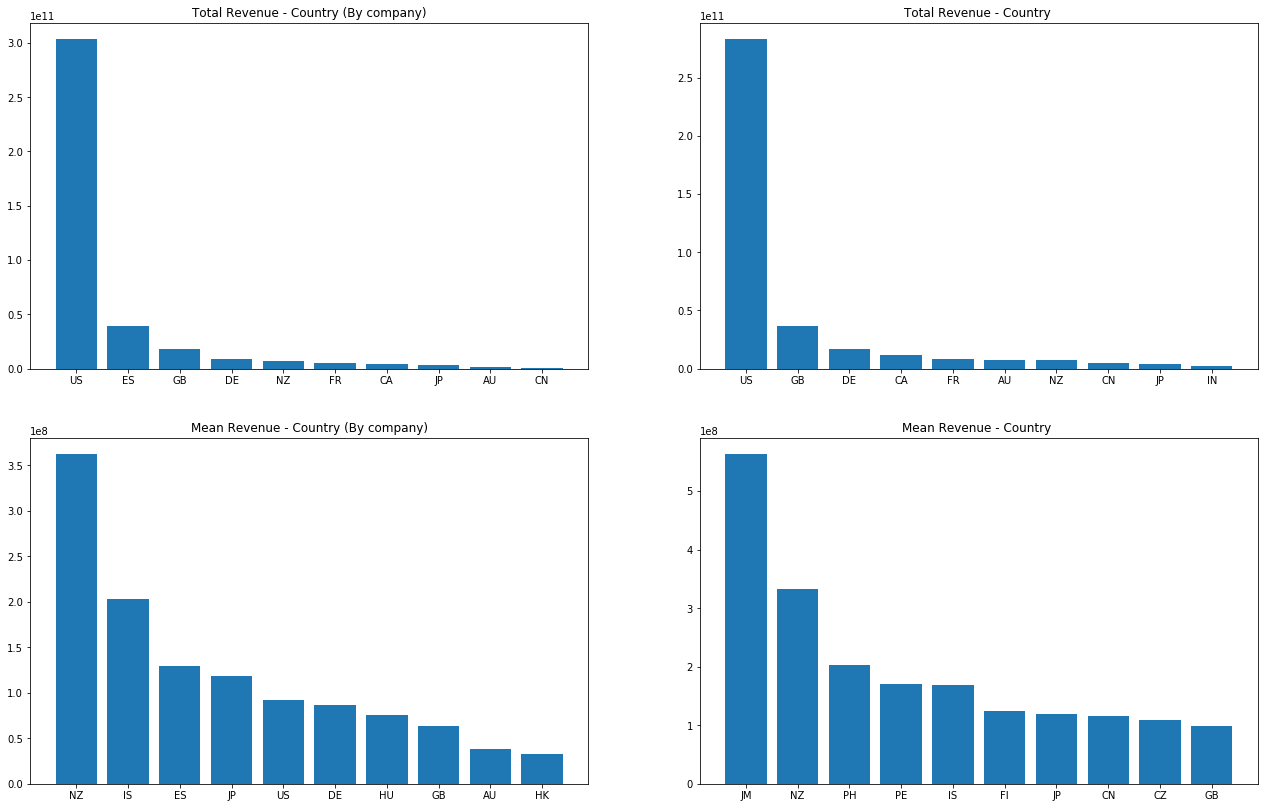

In [15]:
countries_by_company = df_movies.groupby("original_country")["revenue"].sum().sort_values(ascending=False)[:10]
countries = df_movies.groupby("original_country2")["revenue"].sum().sort_values(ascending=False)[:10]

countries_mean_by_company = df_movies.groupby("original_country")["revenue"].mean().sort_values(ascending=False)[:10]
countries_mean = df_movies.groupby("original_country2")["revenue"].mean().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(2, 2, figsize=(22, 14))

ax[0][0].bar(countries_by_company.index, countries_by_company.values)
ax[0][0].set_title("Total Revenue - Country (By company)")
ax[0][1].bar(countries.index, countries.values)
ax[0][1].set_title("Total Revenue - Country ")
ax[1][0].bar(countries_mean_by_company.index, countries_mean_by_company.values)
ax[1][0].set_title("Mean Revenue - Country (By company)")
ax[1][1].bar(countries_mean.index, countries_mean.values)
ax[1][1].set_title("Mean Revenue - Country ")
plt.show()

When measuring the revenune of the countries not based on the companies, we can see that the mean revenue of Jamaica is the highest mean revenue.

Actually the movie was produced in Jamaica but it's the American movie ()

In [22]:
df_movies[df_movies["original_country2"] == "JM"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,country,company,original_country,original_country2,continent
12,200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,58,"[{""id"": 616, ""name"": ""witch""}, {""id"": 663, ""na...",en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,145.847379,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,7.0,5246,"[JM, US, BS, DM]","[Walt Disney Pictures, Jerry Bruckheimer Films...",US,JM,Americas
4339,950000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.mgm.com/#/our-titles/566/Dr.-No,646,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,Dr. No,"In the film that launched the James Bond saga,...",48.901542,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,Released,NOW meet the most extraordinary gentleman spy ...,Dr. No,6.9,940,"[JM, GB]","[United Artists, Eon Productions]",US,JM,Americas


in the below bar charts, I only show 10 countries having the highest revenue
# the difference between two charts is not really significant, both approaches are appropriate

In [16]:
df_movies["continent"] = df_movies["original_country"].apply(lambda x: global_countries[x]["region"])

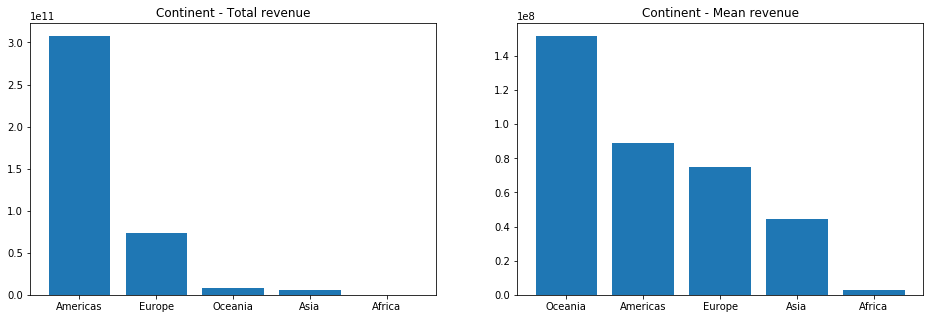

In [17]:
# from the charts, even though the total revenue is way more higher,
# but Oceania has the higher mean revenue than Americas.
# It seems like the low popularity movies of Americas drags the mean value down
continents = df_movies.groupby("continent")["revenue"].sum().sort_values(ascending=False)
continents_mean = df_movies.groupby("continent")["revenue"].mean().sort_values(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].bar(continents.index, continents.values)
ax[0].set_title("Total revenue - Continent")

ax[1].bar(continents_mean.index, continents_mean.values)
ax[1].set_title("Mean revenue - Continent")
plt.show()

In [18]:
# get the revenue of the production countries via company
# get the revenue of the first production country each row